## Problem Statement

Prediction of Conversion Ratio of Leads for an X Education website

In [388]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [389]:
leads = pd.read_csv('Leads.csv')

In [390]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [391]:
leads.head().T

,0,1,2,3,4
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
Lead Number,660737,660728,660727,660719,660681
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Do Not Call,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0


# Data Cleaning

In [392]:
len(leads)

9240

The dataset has values of 9240 leads

In [393]:
leads['Prospect ID'].duplicated().sum()

0




There are 0 duplicates in our data

In [394]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

All parameters have the correct datatype.

In [395]:
leads.isna().sum().to_frame(name='Missing Values').sort_values('Missing Values', ascending=False)

,Missing Values
Lead Quality,4767
Asymmetrique Activity Index,4218
Asymmetrique Profile Score,4218
Asymmetrique Activity Score,4218
Asymmetrique Profile Index,4218
Tags,3353
Lead Profile,2709
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461


If a column has more than 3000 missing values, it is not efficient data. We drop those columns.

In [396]:
for i in leads.columns:
    if leads[i].isna().sum()>3000:
        leads.drop(i, axis=1, inplace=True)

We check and correct each column.

1. Lead Source

In [397]:
leads['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [398]:
leads['Lead Source'].fillna('Google', inplace=True)

In the 'Lead Source' column, we fill missing values with the most frequent one, that is Google

In [399]:
leads['Lead Source'] = leads['Lead Source'].str.replace('google', 'Google')

And also we check and correct if columns name are not written differently.

In [400]:
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

2. Last Activity

In [401]:
leads['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

If we don't have information about last activity of leads, let's simply fill that rows with "Other"

In [402]:
leads['Last Activity'].fillna('Other', inplace=True)

3. City

In [403]:
leads['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

We see some rows are named "Select". Those leads haven'y chosen the city, and we also fill missing values with "Select".

In [404]:
leads['City'].fillna('Select', inplace=True)

4. Specialization

In [405]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

We see some rows are named "Select". Those leads haven'y chosen the specialization, and we also fill missing values with "Select".

In [406]:
leads['Specialization'].fillna('Select', inplace=True)

5. How did you hear about X Education

In [407]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

We see some rows are named "Select". Those leads haven'y chosen the How did you hear about X Education, and we also fill missing values with "Select".

In [408]:
leads['How did you hear about X Education'].fillna('Select', inplace=True)

6. Country

In [409]:
leads['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [410]:
leads[(leads['Country'].isna())&(leads['City'].isna()==False)]['City'].unique()

array(['Select', 'Thane & Outskirts', 'Other Cities of Maharashtra',
       'Mumbai', 'Other Cities', 'Other Metro Cities', 'Tier II Cities'],
      dtype=object)

We check what values city column have when Country column's variables are missing.

In [411]:
leads.loc[(leads['Country'].isna())&(leads['City']=='Mumbai'), 'Country'] = 'India'
leads.loc[(leads['Country'].isna())&(leads['City']=='Other Cities of Maharashtra'), 'Country'] = 'India'
leads['Country'].fillna('unknown', inplace=True)

Mumbai and Maharashtra are in India, we can fill that missing rows with India. But for rest we will fill with "unknown".

7. What is your current occupation

In [412]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [413]:
leads['What is your current occupation'].fillna('Other', inplace=True)

8. Lead Profile

In [414]:
leads['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [415]:
leads['Lead Profile'].fillna('Select', inplace=True)

9. What matters most to you in choosing a course

In [416]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [417]:
leads['What matters most to you in choosing a course'].fillna('Other', inplace=True)

10. TotalVisits

In [418]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [419]:
leads['TotalVisits'].fillna(3, inplace=True)

11. Page Views Per Visit

In [420]:
leads['Page Views Per Visit'].fillna(2, inplace=True)

In [421]:
leads.drop(['Lead Number', 'Prospect ID'], axis = 1)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,unknown,...,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,No,No,No,No,Select,Other Metro Cities,No,No,SMS Sent


Let's make all column names follow the same nameing convention

In [422]:
leads.columns = leads.columns.str.lower().str.replace(' ','_')
string_columns = list(leads.dtypes[leads.dtypes=='Object'].index)

for col in string_columns:
    leads[col] = leads[col].str.lower().str.replace(' ', '_')

Split our data into train and test datasets

In [423]:
from sklearn.model_selection import train_test_split

In [424]:
train_full, test_X = train_test_split(leads, test_size=0.2, random_state=1)

In [425]:
train_X, val_X = train_test_split(train_full, test_size=0.2, random_state=1)

In [426]:
train_y = train_X['converted'].values.reshape(-1,1)
val_y = val_X['converted'].values.reshape(-1,1)
test_y = test_X['converted'].values.reshape(-1,1)

In [427]:
print(f'{len(train_y)}\n{len(val_y)}\n{len(test_y)}')

5913
1479
1848


# Dividing the Data

Let's make two lists: categorical, containing names of categorical variables and numerical, containing names of numerical variables

In [428]:
categorical_df = leads.select_dtypes(include='object')
categorical_df.drop(['prospect_id'], axis=1, inplace=True)
categorical = list(categorical_df.columns)

numerical_df = leads.select_dtypes(exclude='object')
numerical_df.drop(['lead_number', 'converted'], axis=1, inplace=True)
numerical = list(numerical_df)

In [429]:
train_X[categorical].nunique().to_frame('nunique').sort_values('nunique', ascending=False)

,nunique
country,35
lead_source,19
specialization,19
last_activity,17
last_notable_activity,15
how_did_you_hear_about_x_education,10
city,7
lead_profile,6
what_is_your_current_occupation,6
lead_origin,5


# Analysis of Data

In [430]:
train_X['converted'].value_counts()

converted
0    3629
1    2284
Name: count, dtype: int64

In our data, 2832 leads converted their contract and 4560 leads didn't convert. In order to find convering rate we can divide 2831 by 4560 or use mean() funtion, which will do the same thing.

In [431]:
global_mean = round(train_X['converted'].mean(),3)
print(f'Only {global_mean*100}% of leads have been successfully converted.')

Only 38.6% of leads have been successfully converted.


In [432]:
leads.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [433]:
grouped_train = train_X.groupby('what_is_your_current_occupation').converted.agg(['mean'])
grouped_train['reliability'] = grouped_train['mean']/global_mean
grouped_train

,mean,reliability
what_is_your_current_occupation,,
Businessman,0.400000,1.036269
Housewife,1.000000,2.590674
Other,0.147387,0.381832
Student,0.377778,0.978699
Unemployed,0.431573,1.118065
Working Professional,0.924107,2.394060


Housewife and Working Professional categories are most likely to be converted.

In [434]:
def converted_stat(column):
    data_group = train_X.groupby(column).converted.agg(['mean'])
    data_group['reliability'] = data_group['mean']/global_mean
    return data_group

In [435]:
converted_stat('last_activity')

,mean,reliability
last_activity,,
Approached upfront,1.000000,2.590674
Converted to Lead,0.124542,0.322648
Email Bounced,0.084577,0.219112
Email Link Clicked,0.238095,0.616827
Email Marked Spam,1.000000,2.590674
Email Opened,0.367506,0.952087
Email Received,1.000000,2.590674
Form Submitted on Website,0.227848,0.590280
Had a Phone Conversation,0.736842,1.908917


In [436]:
converted_stat('lead_profile')

,mean,reliability
lead_profile,,
Dual Specialization Student,1.000000,2.590674
Lateral Student,0.947368,2.454322
Other Leads,0.353125,0.914832
Potential Lead,0.790831,2.048785
Select,0.300529,0.778572
Student of SomeSchool,0.024390,0.063187


In [437]:
converted_stat('lead_source')

,mean,reliability
lead_source,,
Click2call,0.666667,1.727116
Direct Traffic,0.319214,0.826980
Facebook,0.181818,0.471032
Google,0.404506,1.047944
Live Chat,1.000000,2.590674
NC_EDM,1.000000,2.590674
Olark Chat,0.254222,0.658607
Organic Search,0.379167,0.982297
Pay per Click Ads,0.000000,0.000000


In [438]:
converted_stat('what_matters_most_to_you_in_choosing_a_course')

,mean,reliability
what_matters_most_to_you_in_choosing_a_course,,
Better Career Prospects,0.485245,1.257112
Other,0.143191,0.370961


In [439]:
converted_stat('lead_origin')

,mean,reliability
lead_origin,,
API,0.308132,0.798269
Landing Page Submission,0.363375,0.941386
Lead Add Form,0.924211,2.394328
Lead Import,0.181818,0.471032
Quick Add Form,1.000000,2.590674


In [440]:
converted_stat('specialization')

,mean,reliability
specialization,,
"Banking, Investment And Insurance",0.457014,1.183973
Business Administration,0.455556,1.180196
E-Business,0.432432,1.120291
E-COMMERCE,0.363636,0.942063
Finance Management,0.464678,1.203829
Healthcare Management,0.484848,1.256084
Hospitality Management,0.318841,0.826012
Human Resource Management,0.460573,1.193196
IT Projects Management,0.394958,1.023207


In [441]:
converted_stat('do_not_email')

,mean,reliability
do_not_email,,
No,0.405112,1.049513
Yes,0.170526,0.441778


In [442]:
converted_stat('city')

,mean,reliability
city,,
Mumbai,0.407927,1.056804
Other Cities,0.389522,1.009123
Other Cities of Maharashtra,0.427119,1.106525
Other Metro Cities,0.410359,1.063105
Select,0.343924,0.890996
Thane & Outskirts,0.457906,1.186284
Tier II Cities,0.372093,0.963972


In [443]:
converted_stat('a_free_copy_of_mastering_the_interview')

,mean,reliability
a_free_copy_of_mastering_the_interview,,
No,0.399409,1.034738
Yes,0.357451,0.926040


People who have submitted the Lead Add Form and Quick Add Form are most likely to be converted.

# Logistic Regression

In [444]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, leads['converted'])

data_mi = leads[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')
data_mi

,Mi
what_is_your_current_occupation,0.095197
last_activity,0.088512
lead_profile,0.082869
last_notable_activity,0.073860
lead_source,0.061560
what_matters_most_to_you_in_choosing_a_course,0.060058
lead_origin,0.056251
specialization,0.014624
do_not_email,0.010327
city,0.003002


In [445]:
leads[numerical].corrwith(leads['converted']).to_frame('Correlations')

,Correlations
totalvisits,0.029119
total_time_spent_on_website,0.362483
page_views_per_visit,-0.005068


In [446]:
cat = list(data_mi.iloc[0:9,:].index)

In [447]:
cat

['what_is_your_current_occupation',
 'last_activity',
 'lead_profile',
 'last_notable_activity',
 'lead_source',
 'what_matters_most_to_you_in_choosing_a_course',
 'lead_origin',
 'specialization',
 'do_not_email']

In [448]:
train_dict = train_X[cat+numerical].to_dict(orient='records')

In [449]:
train_dict[0]

{'what_is_your_current_occupation': 'Unemployed',
 'last_activity': 'SMS Sent',
 'lead_profile': 'Select',
 'last_notable_activity': 'SMS Sent',
 'lead_source': 'Direct Traffic',
 'what_matters_most_to_you_in_choosing_a_course': 'Better Career Prospects',
 'lead_origin': 'Landing Page Submission',
 'specialization': 'Supply Chain Management',
 'do_not_email': 'No',
 'totalvisits': 4.0,
 'total_time_spent_on_website': 1376,
 'page_views_per_visit': 4.0}

In [450]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [451]:
len(train_dict[0])

12

In [452]:
#dv.get_feature_names()

In [455]:
val_dict = val_X[cat+numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [456]:
len(X_val[0])

94

In [457]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, train_y)

LogisticRegression(random_state=1, solver='liblinear')

In [458]:
preds = model.predict_proba(X_val)[:,1]

In [459]:
X_val[12]

array([  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 296.,   3.,   0.,   0.,
         0.,   0.,   1.,   0.,   1.,   0.])

In [460]:
preds

array([0.03101186, 0.43507442, 0.81248926, ..., 0.60922484, 0.03101186,
       0.25475963])

In [461]:
preds[:5]

array([0.03101186, 0.43507442, 0.81248926, 0.03699833, 0.95044176])

In [462]:
pred = (preds>0.5).astype(int).reshape(-1,1)

In [463]:
pred[:5]

array([[0],
       [0],
       [1],
       [0],
       [1]])

In [464]:
(pred==val_y).mean()

0.8242055442866801

In [465]:
from sklearn.metrics import accuracy_score

In [466]:
thresholds = np.linspace(0,1,11)

for i in thresholds:
    churn = preds>=i
    acc = accuracy_score(val_y, churn)
    print(f'{round(i,1)} {round(acc,3)}')

0.0 0.371
0.1 0.669
0.2 0.786
0.3 0.823
0.4 0.834
0.5 0.824
0.6 0.811
0.7 0.793
0.8 0.771
0.9 0.728
1.0 0.629


In [467]:
thresholds = np.linspace(0,1,21)
accs = []

for i in thresholds:
    churn = preds>=i
    acc = accuracy_score(val_y, churn)
    accs.append(acc)

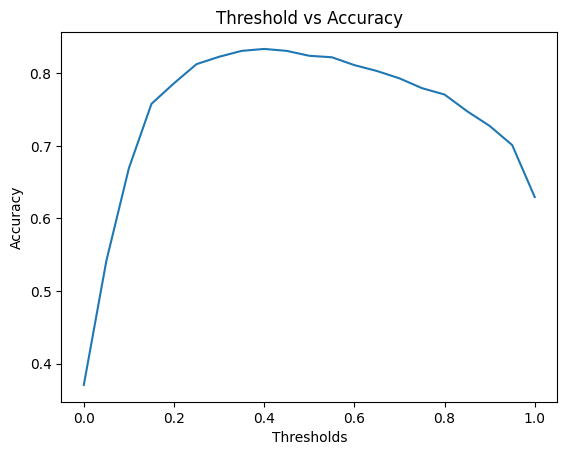

In [468]:
plt.plot(thresholds, accs)
plt.xlabel('Thresholds')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

Threshold = 0.4

In [471]:
test_dict = test_X[cat+numerical].to_dict(orient='records')

In [472]:
test_dict[0]

{'what_is_your_current_occupation': 'Unemployed',
 'last_activity': 'Email Link Clicked',
 'lead_profile': 'Potential Lead',
 'last_notable_activity': 'Modified',
 'lead_source': 'Reference',
 'what_matters_most_to_you_in_choosing_a_course': 'Better Career Prospects',
 'lead_origin': 'Lead Add Form',
 'specialization': 'Services Excellence',
 'do_not_email': 'No',
 'totalvisits': 0.0,
 'total_time_spent_on_website': 0,
 'page_views_per_visit': 0.0}

In [473]:
X_test = dv.transform(test_dict)
X_test[0]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0.])

In [474]:
preds_test = model.predict_proba(X_test)

In [475]:
preds_test = preds_test[:,1]

In [476]:
preds_test[:10]

array([0.91912688, 0.93503539, 0.43071699, 0.13130697, 0.83044827,
       0.05702407, 0.03101186, 0.93607965, 0.82939047, 0.21278632])

In [477]:
pred_test =  (preds_test>0.5).astype(int).reshape(-1,1)

In [478]:
pred_test[:5]

array([[1],
       [1],
       [0],
       [0],
       [1]])

In [479]:
y = pred_test
np.count_nonzero(y == 1)

656

656 leads have been converted

In [480]:
(pred_test==test_y).mean()

0.8403679653679653

There is an 83.93% accuray of our model.

# Confusion Table

In [481]:
t = 0.4

predict_convert = (preds>=t).reshape(-1,1)
predict_no_convert = (preds<t).reshape(-1,1)

actual_convert = (val_y==1)
actual_no_convert = (val_y==0)

true_positive = (predict_convert & actual_convert).sum()
true_negative = (predict_no_convert & actual_no_convert).sum()

false_positive = (predict_convert & actual_no_convert).sum()
false_negative = (predict_no_convert & actual_convert).sum()

In [482]:
confussion_table = np.array([[true_negative, false_positive],[false_negative,true_positive]])
confussion_table

array([[806, 125],
       [121, 427]])

In [483]:
confussion_table/confussion_table.sum()

array([[0.54496281, 0.08451657],
       [0.08181204, 0.28870859]])

In [484]:
tpr = true_positive/(true_positive+false_negative)
fpr = false_positive/(true_negative+false_positive)
print(f'The fraction of true positives among all positive examples: {tpr}\nThe fraction of false positives among all negative examples: {fpr}')

The fraction of true positives among all positive examples: 0.7791970802919708
The fraction of false positives among all negative examples: 0.13426423200859292


# ROC Curve

In [485]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    tp = ((preds>=t).reshape(-1,1)&(val_y==1)).sum()
    fp = ((preds>=t).reshape(-1,1)&(val_y==0)).sum()
    fn = ((preds<t).reshape(-1,1)&(val_y==1)).sum()
    tn = ((preds<t).reshape(-1,1)&(val_y==0)).sum()
    scores.append((t,tp,fp,fn,tn))

In [486]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ['thresholds','tp','fp','fn','tn']
df_scores[::10]

,thresholds,tp,fp,fn,tn
0,0.0,548,931,0,0
10,0.1,532,473,16,458
20,0.2,506,274,42,657
30,0.3,467,181,81,750
40,0.4,427,125,121,806
50,0.5,387,99,161,832
60,0.6,344,75,204,856
70,0.7,295,53,253,878
80,0.8,240,31,308,900
90,0.9,159,14,389,917


In [487]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp+df_scores.tn)
df_scores[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,548,931,0,0,1.000000,1.000000
10,0.1,532,473,16,458,0.970803,0.508056
20,0.2,506,274,42,657,0.923358,0.294307
30,0.3,467,181,81,750,0.852190,0.194415
40,0.4,427,125,121,806,0.779197,0.134264
50,0.5,387,99,161,832,0.706204,0.106337
60,0.6,344,75,204,856,0.627737,0.080559
70,0.7,295,53,253,878,0.538321,0.056928
80,0.8,240,31,308,900,0.437956,0.033298
90,0.9,159,14,389,917,0.290146,0.015038


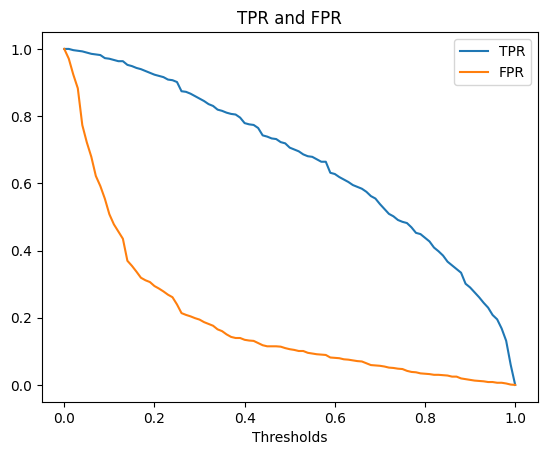

In [488]:
plt.plot(df_scores.thresholds, df_scores.tpr, label='TPR')
plt.plot(df_scores.thresholds, df_scores.fpr, label='FPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR')
plt.legend()
plt.show()

In [489]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size=len(val_y))
y_rand = y_rand.reshape(-1,1)

In [490]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        tp = ((y_pred>=t)&(y_val==1)).sum()
        fp = ((y_pred>=t)&(y_val==0)).sum()
        fn = ((y_pred<t)&(y_val==1)).sum()
        tn = ((y_pred<t)&(y_val==0)).sum()
        scores.append((t,tp,fp,fn,tn))

        df_scores = pd.DataFrame(scores)
    df_scores.columns = ['thresholds','tp','fp','fn','tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp+df_scores.tn)

    return df_scores

In [491]:
df_rand = tpr_fpr_dataframe(val_y, y_rand)

In [492]:
df_rand[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,548,931,0,0,1.000000,1.000000
10,0.1,492,838,56,93,0.897810,0.900107
20,0.2,435,746,113,185,0.793796,0.801289
30,0.3,381,660,167,271,0.695255,0.708915
40,0.4,332,565,216,366,0.605839,0.606874
50,0.5,281,469,267,462,0.512774,0.503759
60,0.6,215,380,333,551,0.392336,0.408163
70,0.7,169,273,379,658,0.308394,0.293233
80,0.8,110,191,438,740,0.200730,0.205156
90,0.9,56,93,492,838,0.102190,0.099893


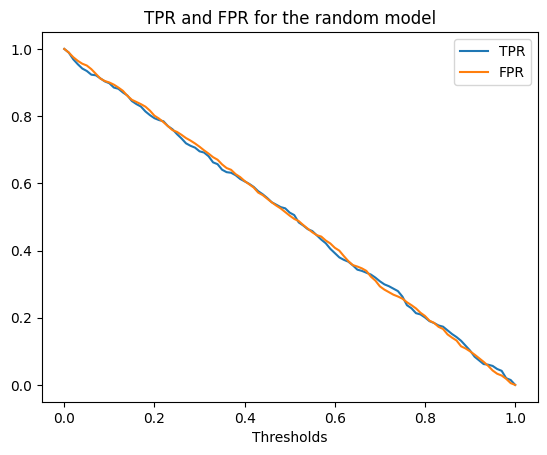

In [493]:
plt.plot(df_rand.thresholds, df_rand.tpr, label='TPR')
plt.plot(df_rand.thresholds, df_rand.fpr, label='FPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')
plt.legend()
plt.show()

In [494]:
num_neg = (val_y==0).sum()
num_pos = (val_y==1).sum()

y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0,1, num_neg+num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,548,931,0,0,1.000000,1.000000
10,0.1,548,783,0,148,1.000000,0.841031
20,0.2,548,635,0,296,1.000000,0.682062
30,0.3,548,487,0,444,1.000000,0.523093
40,0.4,548,339,0,592,1.000000,0.364125
50,0.5,548,192,0,739,1.000000,0.206230
60,0.6,548,44,0,887,1.000000,0.047261
70,0.7,444,0,104,931,0.810219,0.000000
80,0.8,296,0,252,931,0.540146,0.000000
90,0.9,148,0,400,931,0.270073,0.000000


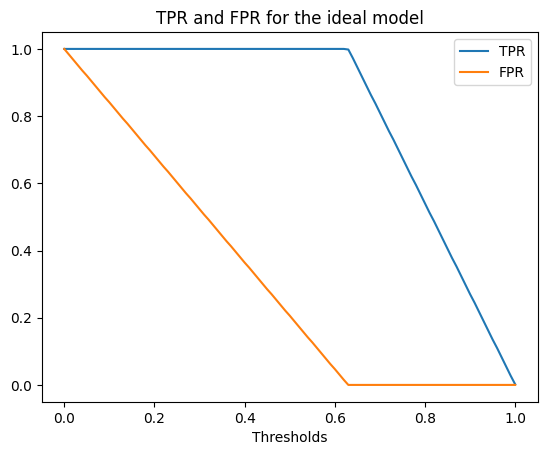

In [495]:
plt.plot(df_ideal.thresholds, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.thresholds, df_ideal.fpr, label='FPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')
plt.legend()
plt.show()

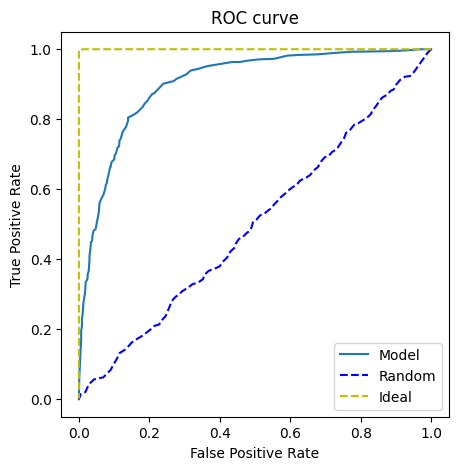

In [496]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label="Model")
plt.plot(df_rand.fpr, df_rand.tpr,'b--', label="Random")
plt.plot(df_ideal.fpr, df_ideal.tpr,'y--',label="Ideal")
plt.legend()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

In [497]:
from sklearn.metrics import roc_curve

In [498]:
fpr, tpr, thresholds = roc_curve(val_y, preds.reshape(-1,1))

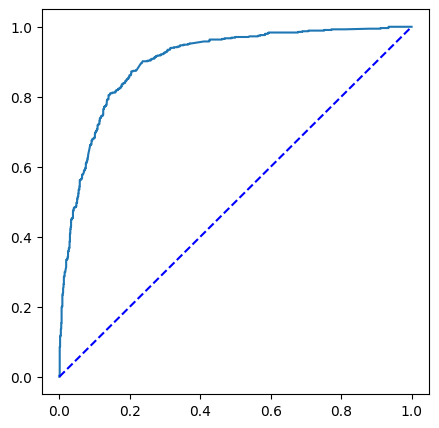

In [499]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'b--')
plt.show()

In [500]:
from sklearn.metrics import auc

In [501]:
auc(fpr,tpr)

0.901810705073424

In [502]:
from sklearn.metrics import roc_auc_score

In [503]:
roc_auc_score(y_ideal, y_pred_ideal)

1.0

In [504]:
roc_auc_score(val_y, y_rand)

0.4981007001340682

An AUC of 0.9 means the model is reasonably good.